In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt # Graphical library
#from sklearn.metrics import mean_squared_error # Mean-squared error function

## Helper class

In [4]:
# This class is used ONLY for graphics
# YOU DO NOT NEED to understand it to work on this coursework

class GraphicsMaze(object):

  def __init__(self, shape, locations, default_reward, obstacle_locs, absorbing_locs, absorbing_rewards, absorbing):

    self.shape = shape
    self.locations = locations
    self.absorbing = absorbing

    # Walls
    self.walls = np.zeros(self.shape)
    for ob in obstacle_locs:
      self.walls[ob] = 20

    # Rewards
    self.rewarders = np.ones(self.shape) * default_reward
    for i, rew in enumerate(absorbing_locs):
      self.rewarders[rew] = 10 if absorbing_rewards[i] > 0 else -10

    # Print the map to show it
    self.paint_maps()

  def paint_maps(self):
    """
    Print the Maze topology (obstacles, absorbing states and rewards)
    input: /
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders)
    plt.show()

  def paint_state(self, state):
    """
    Print one state on the Maze topology (obstacles, absorbing states and rewards)
    input: /
    output: /
    """
    states = np.zeros(self.shape)
    states[state] = 30
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders + states)
    plt.show()

  def draw_deterministic_policy(self, Policy):
    """
    Draw a deterministic policy
    input: Policy {np.array} -- policy to draw (should be an array of values between 0 and 3 (actions))
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders) # Create the graph of the Maze
    for state, action in enumerate(Policy):
      if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any action
        continue
      arrows = [r"$\uparrow$",r"$\rightarrow$", r"$\downarrow$", r"$\leftarrow$"] # List of arrows corresponding to each possible action
      action_arrow = arrows[action] # Take the corresponding action
      location = self.locations[state] # Compute its location on graph
      plt.text(location[1], location[0], action_arrow, ha='center', va='center') # Place it on graph
    plt.show()

  def draw_policy(self, Policy):
    """
    Draw a policy (draw an arrow in the most probable direction)
    input: Policy {np.array} -- policy to draw as probability
    output: /
    """
    deterministic_policy = np.array([np.argmax(Policy[row,:]) for row in range(Policy.shape[0])])
    self.draw_deterministic_policy(deterministic_policy)

  def draw_value(self, Value):
    """
    Draw a policy value
    input: Value {np.array} -- policy values to draw
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders) # Create the graph of the Maze
    for state, value in enumerate(Value):
      if(self.absorbing[0, state]): # If it is an absorbing state, don't plot any value
        continue
      location = self.locations[state] # Compute the value location on graph
      plt.text(location[1], location[0], round(value,2), ha='center', va='center') # Place it on graph
    plt.show()

  def draw_deterministic_policy_grid(self, Policies, title, n_columns, n_lines):
    """
    Draw a grid representing multiple deterministic policies
    input: Policies {np.array of np.array} -- array of policies to draw (each should be an array of values between 0 and 3 (actions))
    output: /
    """
    plt.figure(figsize=(20,8))
    for subplot in range (len(Policies)): # Go through all policies
      ax = plt.subplot(n_columns, n_lines, subplot+1) # Create a subplot for each policy
      ax.imshow(self.walls+self.rewarders) # Create the graph of the Maze
      for state, action in enumerate(Policies[subplot]):
        if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any action
          continue
        arrows = [r"$\uparrow$",r"$\rightarrow$", r"$\downarrow$", r"$\leftarrow$"] # List of arrows corresponding to each possible action
        action_arrow = arrows[action] # Take the corresponding action
        location = self.locations[state] # Compute its location on graph
        plt.text(location[1], location[0], action_arrow, ha='center', va='center') # Place it on graph
      ax.title.set_text(title[subplot]) # Set the title for the graph given as argument
    plt.show()

  def draw_policy_grid(self, Policies, title, n_columns, n_lines):
    """
    Draw a grid representing multiple policies (draw an arrow in the most probable direction)
    input: Policy {np.array} -- array of policies to draw as probability
    output: /
    """
    deterministic_policies = np.array([[np.argmax(Policy[row,:]) for row in range(Policy.shape[0])] for Policy in Policies])
    self.draw_deterministic_policy_grid(deterministic_policies, title, n_columns, n_lines)

  def draw_value_grid(self, Values, title, n_columns, n_lines):
    """
    Draw a grid representing multiple policy values
    input: Values {np.array of np.array} -- array of policy values to draw
    output: /
    """
    plt.figure(figsize=(20,8))
    for subplot in range (len(Values)): # Go through all values
      ax = plt.subplot(n_columns, n_lines, subplot+1) # Create a subplot for each value
      ax.imshow(self.walls+self.rewarders) # Create the graph of the Maze
      for state, value in enumerate(Values[subplot]):
        if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any value
          continue
        location = self.locations[state] # Compute the value location on graph
        plt.text(location[1], location[0], round(value,1), ha='center', va='center') # Place it on graph
      ax.title.set_text(title[subplot]) # Set the title for the graoh given as argument
    plt.show()


## Maze class

In [5]:
# This class define the Maze environment

class Maze(object):

  # [Action required]
  def __init__(self):
    """
    Maze initialisation.
    input: /
    output: /
    """
    
    # [Action required]
    # Properties set from the CID
    y = float(get_CID()[-2])
    z = float(get_CID()[-1])
    self._prob_success = 0.8 + 0.02 * (9 - y) # float
    self._gamma = 0.8 + 0.02 * y # float
    self._goal = int(z) % 4 # integer (0 for R0, 1 for R1, 2 for R2, 3 for R3)

    # Build the maze
    self._build_maze()
                              

  # Functions used to build the Maze environment 
  # You DO NOT NEED to modify them
  def _build_maze(self):
    """
    Maze initialisation.
    input: /
    output: /
    """

    # Properties of the maze
    self._shape = (13, 10)
    self._obstacle_locs = [
                          (1,0), (1,1), (1,2), (1,3), (1,4), (1,7), (1,8), (1,9), \
                          (2,1), (2,2), (2,3), (2,7), \
                          (3,1), (3,2), (3,3), (3,7), \
                          (4,1), (4,7), \
                          (5,1), (5,7), \
                          (6,5), (6,6), (6,7), \
                          (8,0), \
                          (9,0), (9,1), (9,2), (9,6), (9,7), (9,8), (9,9), \
                          (10,0)
                         ] # Location of obstacles
    self._absorbing_locs = [(2,0), (2,9), (10,1), (12,9)] # Location of absorbing states
    self._absorbing_rewards = [ (500 if (i == self._goal) else -50) for i in range (4) ]
    self._starting_locs = [(0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9)] #Reward of absorbing states
    self._default_reward = -1 # Reward for each action performs in the environment
    self._max_t = 500 # Max number of steps in the environment

    # Actions
    self._action_size = 4
    self._direction_names = ['N','E','S','W'] # Direction 0 is 'N', 1 is 'E' and so on
        
    # States
    self._locations = []
    for i in range (self._shape[0]):
      for j in range (self._shape[1]):
        loc = (i,j) 
        # Adding the state to locations if it is no obstacle
        if self._is_location(loc):
          self._locations.append(loc)
    self._state_size = len(self._locations)

    # Neighbours - each line is a state, ranked by state-number, each column is a direction (N, E, S, W)
    self._neighbours = np.zeros((self._state_size, 4)) 
    
    for state in range(self._state_size):
      loc = self._get_loc_from_state(state)

      # North
      neighbour = (loc[0]-1, loc[1]) # North neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('N')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('N')] = state

      # East
      neighbour = (loc[0], loc[1]+1) # East neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('E')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('E')] = state

      # South
      neighbour = (loc[0]+1, loc[1]) # South neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('S')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('S')] = state

      # West
      neighbour = (loc[0], loc[1]-1) # West neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('W')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('W')] = state

    # Absorbing
    self._absorbing = np.zeros((1, self._state_size))
    for a in self._absorbing_locs:
      absorbing_state = self._get_state_from_loc(a)
      self._absorbing[0, absorbing_state] = 1

    # Transition matrix
    self._T = np.zeros((self._state_size, self._state_size, self._action_size)) # Empty matrix of domension S*S*A
    for action in range(self._action_size):
      for outcome in range(4): # For each direction (N, E, S, W)
        # The agent has prob_success probability to go in the correct direction
        if action == outcome:
          prob = 1 - 3.0 * ((1.0 - self._prob_success) / 3.0) # (theoritically equal to self.prob_success but avoid rounding error and garanty a sum of 1)
        # Equal probability to go into one of the other directions
        else:
          prob = (1.0 - self._prob_success) / 3.0
          
        # Write this probability in the transition matrix
        for prior_state in range(self._state_size):
          # If absorbing state, probability of 0 to go to any other states
          if not self._absorbing[0, prior_state]:
            post_state = self._neighbours[prior_state, outcome] # Post state number
            post_state = int(post_state) # Transform in integer to avoid error
            self._T[prior_state, post_state, action] += prob

    # Reward matrix
    self._R = np.ones((self._state_size, self._state_size, self._action_size)) # Matrix filled with 1
    self._R = self._default_reward * self._R # Set default_reward everywhere
    for i in range(len(self._absorbing_rewards)): # Set absorbing states rewards
      post_state = self._get_state_from_loc(self._absorbing_locs[i])
      self._R[:,post_state,:] = self._absorbing_rewards[i]

    # Creating the graphical Maze world
    self._graphics = GraphicsMaze(self._shape, self._locations, self._default_reward, self._obstacle_locs, self._absorbing_locs, self._absorbing_rewards, self._absorbing)
    
    # Reset the environment
    self.reset()


  def _is_location(self, loc):
    """
    Is the location a valid state (not out of Maze and not an obstacle)
    input: loc {tuple} -- location of the state
    output: _ {bool} -- is the location a valid state
    """
    if (loc[0] < 0 or loc[1] < 0 or loc[0] > self._shape[0]-1 or loc[1] > self._shape[1]-1):
      return False
    elif (loc in self._obstacle_locs):
      return False
    else:
      return True


  def _get_state_from_loc(self, loc):
    """
    Get the state number corresponding to a given location
    input: loc {tuple} -- location of the state
    output: index {int} -- corresponding state number
    """
    return self._locations.index(tuple(loc))


  def _get_loc_from_state(self, state):
    """
    Get the state number corresponding to a given location
    input: index {int} -- state number
    output: loc {tuple} -- corresponding location
    """
    return self._locations[state]

  # Getter functions used only for DP agents
  # You DO NOT NEED to modify them
  def get_T(self):
    return self._T

  def get_R(self):
    return self._R

  def get_absorbing(self):
    return self._absorbing

  # Getter functions used for DP, MC and TD agents
  # You DO NOT NEED to modify them
  def get_graphics(self):
    return self._graphics

  def get_action_size(self):
    return self._action_size

  def get_state_size(self):
    return self._state_size

  def get_gamma(self):
    return self._gamma

  # Functions used to perform episodes in the Maze environment
  def reset(self):
    """
    Reset the environment state to one of the possible starting states
    input: /
    output: 
      - t {int} -- current timestep
      - state {int} -- current state of the envionment
      - reward {int} -- current reward
      - done {bool} -- True if reach a terminal state / 0 otherwise
    """
    self._t = 0
    self._state = self._get_state_from_loc(self._starting_locs[random.randrange(len(self._starting_locs))])
    self._reward = 0
    self._done = False
    return self._t, self._state, self._reward, self._done

  def step(self, action):
    """
    Perform an action in the environment
    input: action {int} -- action to perform
    output: 
      - t {int} -- current timestep
      - state {int} -- current state of the envionment
      - reward {int} -- current reward
      - done {bool} -- True if reach a terminal state / 0 otherwise
    """

    # If environment already finished, print an error
    if self._done or self._absorbing[0, self._state]:
      print("Please reset the environment")
      return self._t, self._state, self._reward, self._done

    # Drawing a random number used for probaility of next state
    probability_success = random.uniform(0,1)

    # Look for the first possible next states (so get a reachable state even if probability_success = 0)
    new_state = 0
    while self._T[self._state, new_state, action] == 0: 
      new_state += 1
    assert self._T[self._state, new_state, action] != 0, "Selected initial state should be probability 0, something might be wrong in the environment."

    # Find the first state for which probability of occurence matches the random value
    total_probability = self._T[self._state, new_state, action]
    while (total_probability < probability_success) and (new_state < self._state_size-1):
     new_state += 1
     total_probability += self._T[self._state, new_state, action]
    assert self._T[self._state, new_state, action] != 0, "Selected state should be probability 0, something might be wrong in the environment."
    
    # Setting new t, state, reward and done
    self._t += 1
    self._reward = self._R[self._state, new_state, action]
    self._done = self._absorbing[0, new_state] or self._t > self._max_t
    self._state = new_state
    return self._t, self._state, self._reward, self._done

## DP Agent

In [6]:
# This class define the Dynamic Programing agent 

class DP_agent(object):

  # [Action required]
  # WARNING: make sure this function can be called by the auto-marking script
    
    def policy_evaluation(self, absorbing, R, T, policy, gamma, threshold = 0.0001):

        state_size = policy.shape[0]
        action_size = policy.shape[1]


        # Ensure inputed gamma is valid
        assert (gamma <=1) and (gamma >= 0), "Discount factor should be in [0, 1]."

        # Initialisation
        delta= 2*threshold # Ensure delta is bigger than the threshold to start the loop
        V = np.zeros(state_size) # Initialise value function to 0
        Vnew = np.copy(V) # Make a deep copy of the value array to hold the update during the evaluation    
        epoch = 0

        # Loop until convergence
        while delta > threshold:
            epoch += 1

            for prior_state in range(state_size):
                if not absorbing[0, prior_state]: # Ensure state are non-absorbing

                    tmpV = 0 # Temporary variable for V
                    for action in range(action_size):
                        tmpQ = 0 # Temporary variable for Q
                        for post_state in range(state_size):
                            tmpQ = tmpQ + T[prior_state, post_state, action] * (R[prior_state, post_state, action] + gamma * V[post_state])
                        tmpV += policy[prior_state, action] * tmpQ

                    # Update the value of the state
                    Vnew[prior_state] = tmpV

            # Compute new delta (other stopping criteria may be used)
            delta =  max(abs(Vnew - V))

            # Update V
            V = np.copy(Vnew)

        return V, epoch


    def policy_iteration(self, state_size, action_size, absorbing, R, T, gamma, threshold = 0.0001):

        # Ensure gamma value is valid
        assert (gamma <=1) and (gamma >= 0), "Discount factor should be in [0, 1]."

        # Initialisation
        policy = np.zeros((state_size, action_size))
        policy[:, 0] = 1 
        epochs = 0
        policy_stable = False #if the policy has converged 

        while not policy_stable: 

            # Policy evaluation
            V, epochs_eval = self.policy_evaluation(absorbing, R, T, policy, gamma, threshold = threshold)
            epochs += epochs_eval # Increment epoch

            # Set the boolean to True, it will be set to False later if the policy prove unstable
            policy_stable = True

            # Policy iteration
            for prior_state in range(state_size):
                if not absorbing[0, prior_state]: # Ensure state are non-absorbing

                    # Store the old action (used for convergence criterion)
                    old_action = np.argmax(policy[prior_state, :])

                    # Compute Q value
                    Q = np.zeros(action_size) # Initialise with value 0
                    for post_state in range(state_size):
                        Q += T[prior_state, post_state, :] * (R[prior_state, post_state, :] + gamma * V[post_state])

                    # Compute optimal policy for prior state
                    new_policy = np.zeros(action_size)
                    new_policy[np.argmax(Q)] = 1  # The action that maximises the Q value gets probability 1

                    # Add to general policy
                    policy[prior_state, :] = new_policy

                    # Check if the policy has converged
                    if old_action != np.argmax(policy[prior_state, :]):
                        policy_stable = False

        return policy, V, epochs

    def value_iteration(self, state_size, action_size, absorbing, R, T, gamma, threshold = 0.0001):

        # Ensure gamma value is valid
        assert (gamma <=1) and (gamma >= 0), "Discount factor should be in [0, 1]."

        # Initialisation
        epochs = 0
        delta = threshold # Setting value of delta to go through the first breaking condition
        V = np.zeros(state_size) # Initialise values at 0 for each state

        while delta >= threshold:
            epochs += 1 # Increment the epoch
            delta = 0 # Reinitialise delta value

            # For each state
            for prior_state in range(state_size):

                # If not an absorbing state
                if not absorbing[0, prior_state]:

                    # Store the previous value for that state
                    v = V[prior_state] 

                    # Compute Q value
                    Q = np.zeros(action_size) # Initialise with value 0
                    for post_state in range(state_size):
                        Q += T[prior_state, post_state,:] * (R[prior_state, post_state, :] + gamma * V[post_state])

                    # Set the new value to the maximum of Q
                    V[prior_state]= np.max(Q) 

                    # Compute the new delta
                    delta = max(delta, np.abs(v - V[prior_state]))


        # When the loop is finished, fill in the optimal policy
        policy = np.zeros((state_size, action_size)) # Initialisation

        for prior_state in range(state_size):

            # Compute the Q value
            Q = np.zeros(action_size)

            for post_state in range(state_size):
                Q += T[prior_state, post_state,:] * (R[prior_state, post_state, :] + gamma * V[post_state])

            # The action that maximises the Q value gets probability 1
            policy[prior_state, np.argmax(Q)] = 1 

        return policy, V, epochs
    
    def solve(self, env):
    
        """
        Solve a given Maze environment using Dynamic Programming
        input: env {Maze object} -- Maze to solve
        output: 
          - policy {np.array} -- Optimal policy found to solve the given Maze environment 
          - V {np.array} -- Corresponding value function 
        """
    
        # Initialisation (can be edited)
        policy = np.zeros((env.get_state_size(), env.get_action_size())) 
        V = np.zeros(env.get_state_size())

        #### 
        # Add your code here
        # WARNING: for this agent only, you are allowed to access env.get_T(), env.get_R() and env.get_absorbing()
        ####

        absorbing = env.get_absorbing()
        R = env.get_R()
        T = env.get_T()
        state_size = env.get_state_size()
        action_size = env.get_action_size()
        gamma = env._gamma
    
        # Get optimal policy, values and epochs using policy iteration
        pi_p_iter, V_p_iter, ep_p_iter = self.policy_iteration(state_size, action_size, absorbing, R, T, gamma, threshold = 0.0001)
    
        # Get optimal policy, values and epochs using value iteration
        pi_val_iter, V_val_iter, ep_val_iter = self.value_iteration(state_size, action_size, absorbing, R, T, gamma, threshold = 0.0001)
    
        #Compare the number of epochs required for policy iteration and value iteration algorithms

        print(f'Policy iteration took {ep_p_iter} iterations')
        print(f'Value iteration took {ep_val_iter} iterations')
    
        if ep_p_iter <= ep_val_iter:
            policy = pi_p_iter
            V = V_p_iter
        else: 
            policy = pi_val_iter
            V = V_val_iter
   
        return policy, V 


    def solve_value_it_custom_gamma(self, gamma, env):
    
        """
        Solve a given Maze environment using Dynamic Programming
        input: env {Maze object} -- Maze to solve
        output: 
          - policy {np.array} -- Optimal policy found to solve the given Maze environment 
          - V {np.array} -- Corresponding value function 
        """
    
        # Initialisation (can be edited)
        policy = np.zeros((env.get_state_size(), env.get_action_size())) 
        V = np.zeros(env.get_state_size())

        #### 
        # Add your code here
        # WARNING: for this agent only, you are allowed to access env.get_T(), env.get_R() and env.get_absorbing()
        ####

        absorbing = env.get_absorbing()
        R = env.get_R()
        T = env.get_T()
        state_size = env.get_state_size()
        action_size = env.get_action_size()
    
    
        # Get optimal policy, values and epochs using value iteration
        pi_val_iter, V_val_iter, ep_val_iter = self.value_iteration(state_size, action_size, absorbing, R, T, gamma, threshold = 0.0001)
        print(f'Value iteration took {ep_val_iter} iterations')
    
        return pi_val_iter, V_val_iter, ep_val_iter


## MC agent

In [20]:
# This class define the Monte-Carlo agent

from collections import defaultdict

class MC_agent(object):

    def __init__(self) -> None:
        self.num_episodes = 10000 
        self.num_epochs = 50
        self.epsilon = 0.6 
        
    def make_epsilon_greedy_fn(self, epsilon, Q, action_size):
    
        def create_policy_function(state): 
            probabilities = np.ones(action_size, dtype=float) * epsilon / action_size
            best_action = np.argmax(Q[state])
            probabilities[best_action] += (1.0 - epsilon)
            
            return probabilities
    
        return create_policy_function
    
    
    def first_visit(self, env, epsilon, num_epochs, num_episodes):
        
        """ Solves a given Maze environment using First Visit Monte Carlo learning
        input:
          - env {Maze object} -- Maze to solve
          - epsilon {float} - exploration rate value
          - num_epochs {int} - number of replications to run 
          - num_episodes {int} - number of episodes to run 
        output: 
          - policy {np.array} -- Optimal policy found to solve the given Maze environment 
          - values {list of np.array} -- Final values 
          - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each episode
          - values_all {list of np.array} -- List of successive value function for each episode
        """

        # Initialisation (can be edited)
        Q = np.random.rand(env.get_state_size(), env.get_action_size()) 
        V = np.zeros(env.get_state_size())
        policy = np.zeros((env.get_state_size(), env.get_action_size())) 
        values = [V]
        total_rewards = np.zeros((num_epochs,num_episodes))
        values_epoch = []
        values_all = []
        
        #### 
        # Add your code here
        # WARNING: this agent only has access to env.reset() and env.step()
        # You should not use env.get_T(), env.get_R() or env.get_absorbing() to compute any value
        ####
    
        state_size = env.get_state_size()
        action_size = env.get_action_size()
        gamma = env._gamma
        epsilon_greedy_policy = self.make_epsilon_greedy_fn(epsilon, Q, action_size)
        
        for epoch in range(num_epochs): 
            
            values_epoch = []
            
            G_sum = defaultdict(float)
            G_count = defaultdict(float)
        
        
            for episode_idx in range(num_episodes): 
                if episode_idx % 1000 == 0:
                     print("\rEpisode {}/{}. Epoch {}".format(episode_idx, num_episodes, epoch), end="")
    
        
                # Reset the environment and pick the first action
                episode = [] # create an array to store (state,action,reward) tuples
                _, state, _, _ = env.reset() 
                is_finished = False
                R_episode = 0.


                
                #num_steps = 0

                while not is_finished:
                    #num_steps +=1

                    #Take a step in the environment

                    #first, get the greedy policy given the unupdated Q to get the action probabilities
                    action_probabilities = epsilon_greedy_policy(state)
                    policy[state] = action_probabilities

                    #Select a next action to take given the probabilities and make a step with this action
                    action = np.random.choice(np.arange(len(action_probabilities)), p=action_probabilities)
                    _, next_state, reward, is_finished = env.step(action)

                    #Update reward and episode array
                    R_episode +=reward
                    episode.append((state,action,reward))

                    # update current state to next state
                    state = next_state
                    
                    #if num_steps >= env._max_t:
                        #break


                # After running the episode, let's update 

                # Let's look at all (state, action) pairs that we've visited in this episode
                # Convert each state-action pair to a tuple for later use a a dict key

                state_action_pairs = set([(tuple([n[0], n[1]])) for n in episode])
                for pair in state_action_pairs: 
                    state, action = pair

                    # Identify the timestep when this state-action pair occured for the first time
                    first_pair_idx  = next(t for t, n in enumerate(episode) 
                                           if n[0] == state and n[1] == action) # this returns the (state, action, reward) tuple for the first occurence

                    # Sum all the rewards since the first occurence: n[2] corresponds to reward in each tuple of episode list

                    episode_after_first = episode[first_pair_idx:]

                    G = sum([(gamma**t)*n[2] for t, n in enumerate(episode_after_first)])

                    # Use incremental return mean for this state-action pair to update the Q value

                    G_sum[pair] +=G
                    G_count[pair]+= 1.
                    Q[state][action] = G_sum[pair]/G_count[pair]


                #Calculate the total reward per epoch and episode
                total_rewards[epoch][episode_idx - 1] = R_episode
                
                values_epoch.append([Q.max(axis = 1)])
            
            values_all.append(values_epoch)

            values = [Q.max(axis = 1)]
    
                
    

        return policy, values, total_rewards, values_all
    
    
    def every_visit(self, env, epsilon, num_epochs, num_episodes):
        
        """
        Solve a given Maze environment using Every Visit Monte Carlo learning
        input: 
          - env {Maze object} -- Maze to solve
          - epsilon {float} - exploration rate value
          - num_epochs {int} - number of replications to run 
          - num_episodes {int} - number of episodes to run 
        output: 
          - policy {np.array} -- Optimal policy found to solve the given Maze environment 
          - values {list of np.array} -- Final values 
          - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each episode
          - values_all {list of np.array} -- List of successive value function for each episode
        """

        # Initialisation (can be edited)
        Q = np.random.rand(env.get_state_size(), env.get_action_size()) 
        V = np.zeros(env.get_state_size())
        policy = np.zeros((env.get_state_size(), env.get_action_size())) 
        values = [V]
        total_rewards = np.zeros((num_epochs,num_episodes))
        values_epoch = []
        values_all = []

        #### 
        # Add your code here
        # WARNING: this agent only has access to env.reset() and env.step()
        # You should not use env.get_T(), env.get_R() or env.get_absorbing() to compute any value
        ####
      
        state_size = env.get_state_size()
        action_size = env.get_action_size()
        gamma = env._gamma
        epsilon_greedy_policy = self.make_epsilon_greedy_fn(epsilon, Q, action_size)
        
        for epoch in range(num_epochs): 
            G_sum = defaultdict(float)
            G_count = defaultdict(float)
        
            values_epoch = []
            
            for episode_idx in range(num_episodes): 
                if episode_idx % 1000 == 0:
                     print("\rEpisode {}/{}. Epoch {}".format(episode_idx, num_episodes, epoch), end="")
                
                # Reset the environment and pick the first action
                episode = [] # create an array to store (state,action,reward) tuples
                _, state, _, _ = env.reset() 
                is_finished = False
                R_episode = 0.



                while not is_finished:

                    #Take a step in the environment

                    #first, get the greedy policy given the unupdated Q to get the action probabilities
                    action_probabilities = epsilon_greedy_policy(state)
                    policy[state] = action_probabilities

                    #Select a next action to take given the probabilities and make a step with this action
                    action = np.random.choice(np.arange(len(action_probabilities)), p=action_probabilities)
                    _, next_state, reward, is_finished = env.step(action)

                    #Update reward and episode array
                    R_episode +=reward
                    episode.append((state,action,reward))

                    # update current state to next state
                    state = next_state


                # After running the episode, let's update 

                # Let's look at all (state, action) pairs that we've visited in this episode
                # Convert each state-action pair to a tuple for later use a a dict key

                state_action_pairs = set([(tuple([n[0], n[1]])) for n in episode])
                for pair in state_action_pairs: 
                    state, action = pair

                    # Identify the timestep when this state-action pair occured for the first time
                    pair_idx  = [t for t, n in enumerate(episode) 
                                           if n[0] == state and n[1] == action] # this returns the (state, action, reward) tuple for the first occurence

                    # Sum all the rewards since teh first occurence: n[2] corresponds to reward in each tuple of episode list
                    for t in pair_idx:
                        
                        episode_after_first = episode[t:]

                        G = sum([(gamma**t)*n[2] for t, n in enumerate(episode_after_first)])

                        # Use incremental return mean for this state-action pair to update the Q value

                        G_sum[pair] +=G
                        G_count[pair]+= 1.
                        Q[state][action] = G_sum[pair]/G_count[pair]


                #Calculate the total reward per epoch and episode
                total_rewards[epoch][episode_idx - 1] = R_episode
                
                values_epoch.append([Q.max(axis = 1)])
            
            values_all.append(values_epoch)

            values = [Q.max(axis = 1)]
    
                
    

        return policy, values, total_rewards, values_all
    
    
    
    def solve(self, env):
        
        """
        Solve a given Maze environment using Monte Carlo learning
        input: env {Maze object} -- Maze to solve
        output: 
          - policy {np.array} -- Optimal policy found to solve the given Maze environment 
          - values {list of np.array} -- The optimal value function
          - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each episode 
        """
        #### 
        # Add your code here
        # WARNING: this agent only has access to env.reset() and env.step()
        # You should not use env.get_T(), env.get_R() or env.get_absorbing() to compute any value
        ####
        
        
        epsilon = self.epsilon
        num_epochs = self.num_epochs
        num_episodes = self.num_episodes

        policy, values, total_rewards, _ = self.first_visit(env, epsilon, num_epochs, num_episodes)

        return policy, values, total_rewards

## TD agent

In [21]:
# This class define the Temporal-Difference agent

class TD_agent(object):    

    # [Action required]
    # WARNING: make sure this function can be called by the auto-marking script
    
    def __init__(self) -> None:
        self.num_episodes = 10000 
        self.num_epochs = 50 
        self.epsilon = 0.6 
        self.alpha=0.1 
        self.lambd = 0.9

    def make_epsilon_greedy_fn(self, epsilon, Q, action_size):
    
        def create_policy_function(state): 
            probabilities = np.ones(action_size, dtype=float) * epsilon / action_size
            best_action = np.argmax(Q[state])
            probabilities[best_action] += (1.0 - epsilon)
            
            return probabilities
    
        return create_policy_function

    def q_learning(self, env, epsilon, num_epochs, num_episodes, alpha):
        """
        Solve a given Maze environment using Q-learning
        input: 
          - env {Maze object} -- Maze to solve
          - epsilon {float} - exploration rate value
          - num_epochs {int} - number of replications to run 
          - num_episodes {int} - number of episodes to run
          - alpha {float} - learning rate value   
        output: 
          - policy {np.array} -- Optimal policy found to solve the given Maze environment 
          - values {list of np.array} -- Final values 
          - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each episode
          - values_all {list of np.array} -- List of successive value function for each episode
        """

        # Initialisation (can be edited)
        Q = np.random.rand(env.get_state_size(), env.get_action_size()) 
        V = np.zeros(env.get_state_size())
        policy = np.zeros((env.get_state_size(), env.get_action_size())) 
        values = [V]
        R_total = np.zeros((num_epochs,num_episodes))

        values_epoch = []
        values_all = []


        #### 
        # Add your code here
        # WARNING: this agent only has access to env.reset() and env.step()
        # You should not use env.get_T(), env.get_R() or env.get_absorbing() to compute any value
        ####
        state_size = env.get_state_size()
        action_size = env.get_action_size()
        gamma = env._gamma
        
        

        for epoch in range(num_epochs):
            
            values_epoch = []
            
            for episode_idx in range(num_episodes):
                if episode_idx % 1000 == 0:
                    print("\rEpisode {}/{}. Epoch {}".format(episode_idx, num_episodes, epoch), end="")
                

                # Reset the environment and pick the first action
                _, state, _, _ = env.reset() 
                is_finished = False
                R_episode = 0.


                # Decay the epsilon and get the epsilon-greedy policy for it
                policy_fn = self.make_epsilon_greedy_fn(epsilon, Q, action_size)

                # Until the episode is finished (i.e., terminal state reached)
                while not is_finished:

                    # Take a step in the environment

                    # first, get the greedy policy given the unupdated Q to get the action probabilities
                    action_probabilities = policy_fn(state)
                    policy[state] = action_probabilities

                    #Select a next action to take given the probabilities and make a step with this action
                    action = np.random.choice(np.arange(len(action_probabilities)), p=action_probabilities)
                    _, next_state, reward, is_finished = env.step(action)

                    #Update reward 
                    R_episode +=reward

                    #TD update 
                    greedy_policy_action = np.argmax(Q[next_state]) 
                    td_delta = reward + gamma*Q[next_state][greedy_policy_action] - Q[state][action]
                    Q[state][action] += alpha*td_delta

                    state = next_state
                    

                R_total[epoch][episode_idx] = R_episode
                
                values_epoch.append([Q.max(axis = 1)])
            
            values_all.append(values_epoch)

            values = [Q.max(axis = 1)]

        return policy, values, R_total, values_all

    def sarsa_lambda(self, env, epsilon, num_epochs, num_episodes, lambd, alpha):
        """
        input: 
          - env {Maze object} -- Maze to solve
          - epsilon {float} - exploration rate value
          - num_epochs {int} - number of replications to run 
          - num_episodes {int} - number of episodes to run
          - lambd {float} - lambda value for calculating eligibility traces
          - alpha {float} - learning rate value   
        output: 
          - policy {np.array} -- Optimal policy found to solve the given Maze environment 
          - values {list of np.array} -- Final values 
          - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each episode
          - values_all {list of np.array} -- List of successive value function for each episode
        """

        # Initialisation (can be edited)
        Q = np.random.rand(env.get_state_size(), env.get_action_size()) 
        V = np.zeros(env.get_state_size())
        policy = np.zeros((env.get_state_size(), env.get_action_size())) 
        values = [V]
        R_total = np.zeros((num_epochs,num_episodes))
        values_epoch = []
        values_all = []



        #### 
        # Add your code here
        # WARNING: this agent only has access to env.reset() and env.step()
        # You should not use env.get_T(), env.get_R() or env.get_absorbing() to compute any value
        ####
        state_size = env.get_state_size()
        action_size = env.get_action_size()
        gamma = env._gamma
        

        for epoch in range(num_epochs):
            values_epoch = []
            
            for episode_idx in range(num_episodes):
                if episode_idx % 1000 == 0:
                    print("\rEpisode {}/{}. Epoch {}".format(episode_idx, num_episodes, epoch), end="")


                
                # Reset the environment and pick the first action
                _, state, _, _ = env.reset() 
                is_finished = False
                R_episode = 0.

                # Reset the eligibility trace
                E = np.zeros((env.get_state_size(), env.get_action_size())) 

                # Get the epsilon-greedy policy for it
        
                policy_fn = self.make_epsilon_greedy_fn(epsilon, Q, action_size)

                # Until the episode is finished (i.e., terminal state reached)
                while not is_finished:

                    # Take a step in the environment

                    # first, get the greedy policy given the unupdated Q to get the action probabilities
                    action_probabilities = policy_fn(state)
                    policy[state] = action_probabilities

                    #Select a next action to take given the probabilities and make a step with this action
                    action = np.random.choice(np.arange(len(action_probabilities)), p=action_probabilities)
                    _, next_state, reward, is_finished = env.step(action)

                    #Update reward 
                    R_episode +=reward

                    #TD update 
                    next_action_probabilities = policy_fn(next_state)
                    policy[next_state] = next_action_probabilities
                    next_action = np.random.choice(np.arange(len(next_action_probabilities)), p=next_action_probabilities)
                    td_delta = reward + gamma*Q[next_state][next_action] - Q[state][action]
                    E[state][action] += 1.

                    state = next_state
                    
                    for s in range(state_size):
                        for a in range(action_size):

                            #Update all Qs using eligibility trace 

                            Q[s][a] += alpha*td_delta*E[s][a]
                            E[s][a] *= gamma*lambd

                    

                R_total[epoch][episode_idx] = R_episode
                
                values_epoch.append([Q.max(axis = 1)])
            
            values_all.append(values_epoch)


            values = [Q.max(axis = 1)]



        return policy, values, R_total, values_all
    
    def solve(self, env):
        """
        Solve a given Maze environment using Temporal Difference learning
        input: env {Maze object} -- Maze to solve
        output: 
          - policy {np.array} -- Optimal policy found to solve the given Maze environment 
          - values {list of np.array} -- The optimal value function 
          - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each episode 
        """

        # Initialisation (can be edited)
        Q = np.random.rand(env.get_state_size(), env.get_action_size()) 
        V = np.zeros(env.get_state_size())
        policy = np.zeros((env.get_state_size(), env.get_action_size())) 
        values = [V]
        total_rewards = []

    #### 
    # Add your code here
    # WARNING: this agent only has access to env.reset() and env.step()
    # You should not use env.get_T(), env.get_R() or env.get_absorbing() to compute any value
    ####
    
        
        num_epochs = self.num_epochs
        num_episodes = self.num_episodes
        epsilon = self.epsilon
        lambd = self.lambd
        alpha = self.alpha
        
        policy, values, total_rewards, _  = self.q_learning(env, epsilon, num_epochs, num_episodes, alpha)


        return policy, values, total_rewards

## Example main

Creating the Maze:



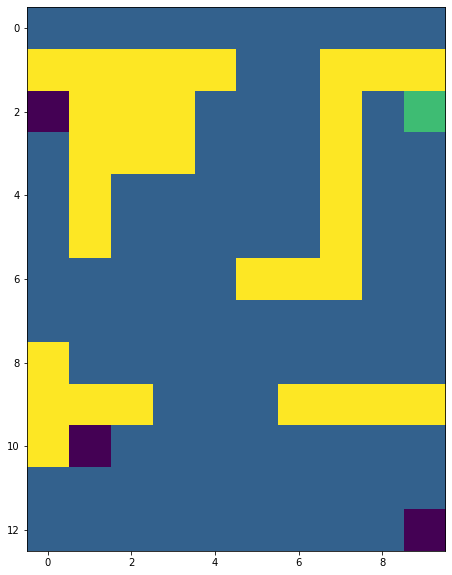

Policy iteration took 204 iterations
Value iteration took 24 iterations
Results of the DP agent:



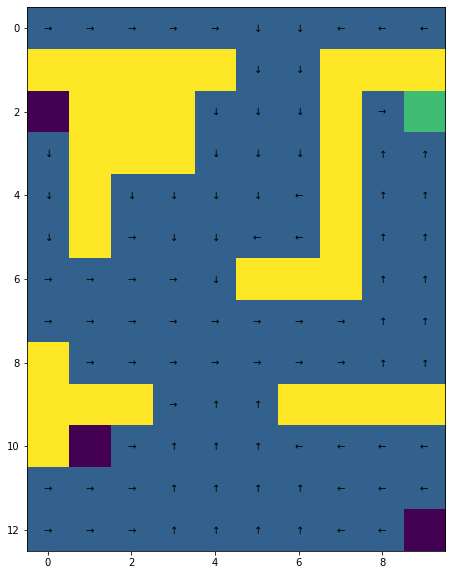

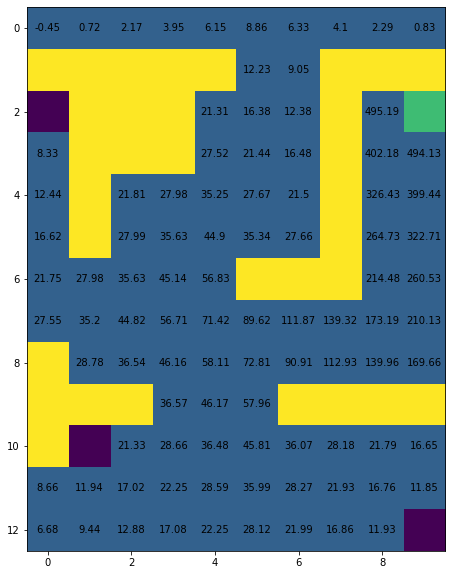

Episode 9000/10000. Epoch 49Results of the MC agent:



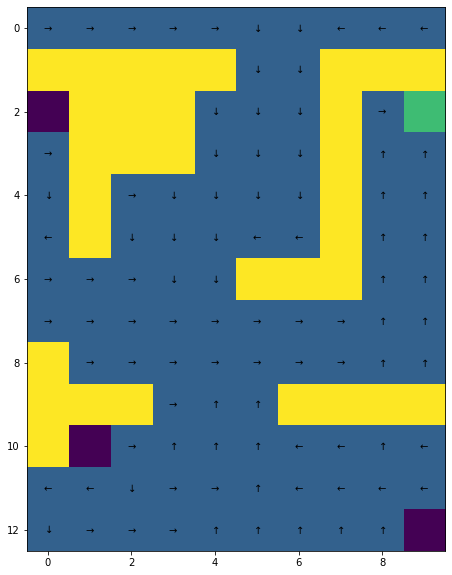

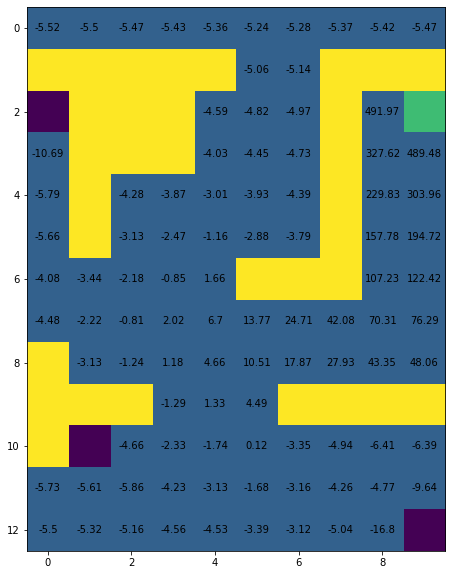

Episode 9000/10000. Epoch 49Results of the TD agent:



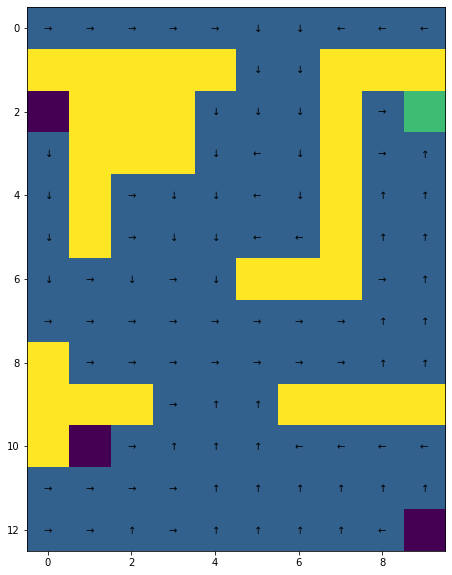

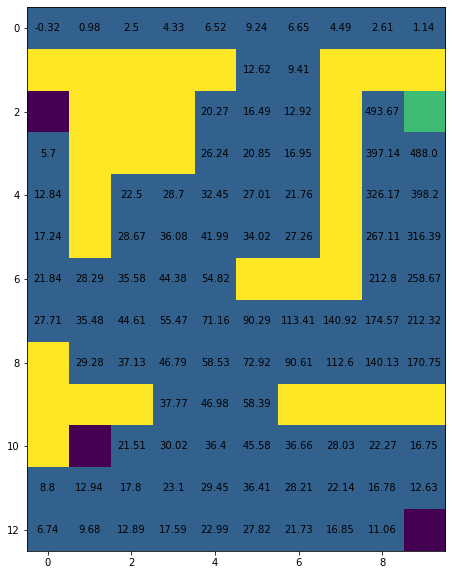

In [22]:
# Example main (can be edited)

if __name__ == '__main__':
    ### Question 0: Defining the environment

    print("Creating the Maze:\n")
    maze = Maze()


    ### Question 1: Dynamic programming

    dp_agent = DP_agent()
    dp_policy, dp_value = dp_agent.solve(maze)

    print("Results of the DP agent:\n")
    maze.get_graphics().draw_policy(dp_policy)
    maze.get_graphics().draw_value(dp_value)


    ### Question 2: Monte-Carlo learning

    mc_agent = MC_agent()
    mc_policy, mc_values, total_rewards = mc_agent.solve(maze)

    print("Results of the MC agent:\n")
    maze.get_graphics().draw_policy(mc_policy)
    maze.get_graphics().draw_value(mc_values[-1])


    ### Question 3: Temporal-Difference learning

    td_agent = TD_agent()
    td_policy, td_values, total_rewards = td_agent.solve(maze)

    print("Results of the TD agent:\n")
    maze.get_graphics().draw_policy(td_policy)
    maze.get_graphics().draw_value(td_values[-1])